In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#importing
under_dataframe= pd.read_csv('undersample.csv')

In [3]:
#Average length of each row 197.466
under_dataframe.comments_nostop.str.len().mean()
#Unique Word count 140
_over_count = pd.Series(' '.join(under_dataframe['comments_nostop'] ).split()).value_counts()
_over_count.nunique() 

140

In [4]:
under_dataframe.head

<bound method NDFrame.head of       Unnamed: 0.1  Unnamed: 0  listing_id           id        date  \
0              181         200    294281.0   10617402.0   28/2/2014   
1              184         203    294281.0   17017063.0    5/8/2014   
2              244         271    294281.0  560200336.0   6/11/2019   
3              434         479    369145.0    4995826.0    6/6/2013   
4              457         503    369145.0   11639495.0   10/4/2014   
...            ...         ...         ...          ...         ...   
1645         17934       20857  14719882.0  242968565.0   14/3/2018   
1646         34434       39898  39218665.0  574030421.0   7/12/2019   
1647         34798       40323  40748069.0  734647552.0   27/2/2021   
1648         18031       20970  15087980.0  120823689.0  11/12/2016   
1649         33625       38989  36456243.0  596242192.0   22/1/2020   

      reviewer_id  reviewer_name  \
0       1370876.0        Deborah   
1      18295170.0            Zhi   
2      15

In [5]:
def tweet_to_words(comment):
    ''' Convert tweet text into a sequence of words '''
    # convert to lowercase
    text = comment.lower()
    # tokenize
    words = text.split()
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words


In [6]:
X = list(map(tweet_to_words, under_dataframe['comments_nostop']))

In [7]:
from sklearn.preprocessing import LabelEncoder
# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(under_dataframe['bin_word'])

In [8]:
print(X[0])
print(Y[0])

['we', 'never', 'saw', 'host', 'elisabeth', 'hasnt', 'month', 'month', 'come', 'accord', 'info', 'receiv', 'phone', 'arriv', 'we', 'spoke', 'person', 'phone', 'airport', 'told', 'us', 'key', 'would', 'mat', 'togeth', 'key', 'guest', 'the', 'place', 'quit', 'filthi', 'dirti', 'shoe', 'sink', 'empti', 'wine', 'bottl', 'room', 'hole', 'sheet', 'everyth', 'cover', 'grime', 'we', 'decid', 'certainli', 'couldnt', 'cook', 'it', 'appear', 'simpli', 'board', 'hous', 'peopl', 'stay', 'check', 'earli', 'none', 'us', 'ever', 'saw', 'host', 'the', 'spirit', 'airbnb', 'stay', 'local', 'famili', 'provid', 'local', 'knowledg', 'certainli', 'absent', 'the', 'locat', 'min', 'walk', 'mrt', 'subway', 'one', 'cross', 'busi', 'highway', 'onc', 'mrt', 'everyth', 'easili', 'reachabl', 'of', 'mani', 'airbnb', 'experi', 'seriou', 'disappoint', 'i', 'would', 'stay', 'cant', 'recommend', 'anyon']
4


In [9]:
y = pd.get_dummies(under_dataframe['bin_word'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
vocabulary_size = 80
#  have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [11]:
print(count_vector.get_feature_names()[0:20])

['airbnb', 'also', 'apart', 'area', 'around', 'bad', 'bathroom', 'bed', 'bit', 'book', 'bu', 'but', 'check', 'clean', 'close', 'comfort', 'conveni', 'day', 'didnt', 'dont']


C:\Users\liang\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


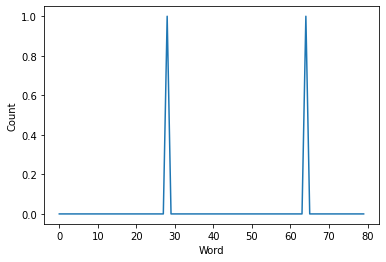

In [12]:
# Plot the BoW feature vector
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 80
max_len= 200

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', under_dataframe['comments_nostop'][0])
X, tokenizer = tokenize_pad_sequences(under_dataframe['comments_nostop'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 WE NEVER SAW HOST ELISABETH HASNT MONTHS MONTHS COME ACCORDING INFO RECEIVED PHONE ARRIVAL WE SPOKE PERSON PHONE AIRPORT TOLD US KEY WOULD MAT TOGETHER KEYS GUESTS THE PLACE QUITE FILTHY DIRTY SHOES SINK EMPTY WINE BOTTLES ROOM HOLES SHEETS EVERYTHING COVERED GRIME WE DECIDED CERTAINLY COULDNT COOK IT APPEARS SIMPLY BOARDING HOUSE PEOPLE STAYED CHECKED EARLY NONE US EVER SAW HOST THE SPIRIT AIRBNB STAY LOCAL FAMILIES PROVIDE LOCAL KNOWLEDGE CERTAINLY ABSENT THE LOCATION MIN WALK MRT SUBWAY ONE CROSS BUSY HIGHWAYS ONCE MRT EVERYTHING EASILY REACHABLE OF MANY AIRBNB EXPERIENCES SERIOUS DISAPPOINTMENT I WOULD STAY CANT RECOMMEND ANYONE
After Tokenization & Padding 
 [16  8 16 19 18  2  4 59 73  3 67 16 21 29 44 19  8  2 22  5  2  7 39 13
 12 13 67 22  1 18  5 57  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 

In [14]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [15]:
y = pd.get_dummies(under_dataframe['bin_word'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (990, 200) (990, 6)
Validation Set -> (330, 200) (330, 6)
Test Set -> (330, 200) (330, 6)


In [16]:
back_up_X_train = X_train
back_up_y_train =  y_train
back_up_X_test =  X_test
back_up_y_test = y_test

In [17]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers  import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 80
embedding_size = 32
epochs= 20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=6, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(6, activation='softmax'))

C:\Users\liang\anaconda3\envs\tf-gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [19]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [20]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 16
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           2560      
_________________________________________________________________
conv1d (Conv1D)              (None, 200, 32)           6176      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 100, 32)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
Total params: 25,766
Trainable params: 25,766
Non-trainable params: 0
____________________________________________________

In [21]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.3424
Precision : 0.6875
Recall    : 0.0333
F1 Score  : 0.0636


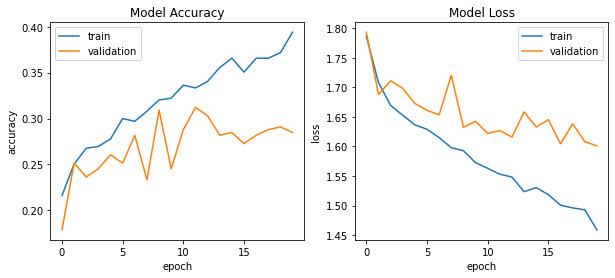

In [22]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

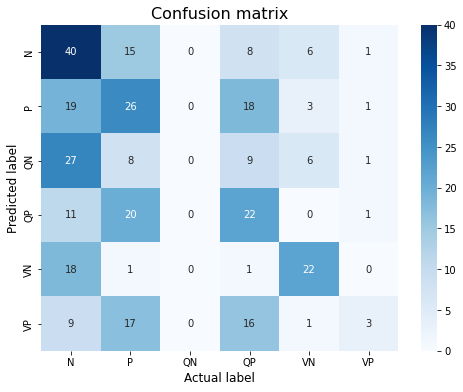

In [23]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    sentiment_classes = ['N', 'P', 'QN','QP','VN','VP']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)